# Exploration

Exploring the preprocessed raw data

In [42]:
import numpy as np
import pandas as pd

In [47]:
def from_disk(path_to_file):
    """Reads raw .txt data from disk and returns a pandas.DataFrame."""
    
    return pd.read_csv(path_to_file , delim_whitespace=True, index_col=0)

In [ ]:
def gen_stats(df):
    
    size = int(df.values).size
    nans = size - np.count_nonzero(np.isnan(df.values))
    
    output = [
        np.max(df.values), 
        np.min(df.values), 
        np.std(df.values),
        size, nans
    ]

In [ ]:
def stats_table(datasets, index=None):
    
    _stats = []
    for dataset in datasets:
        _stats.append(gen_stats(dataset))
        
    df = pd.DataFrame(
        np.array(_stats, dtype=float), 
        columns=['max', 'min', 'std', 'size', 'nan'], 
        index=index
    )
    
    return df

In [55]:
# Load raw data into memory
orig_pvalues = from_disk('./../data/test/emQTL_CorrelationMatrix_unfiltered_pvalues.txt')
sel_pvalues = from_disk('./../data/test/emQTL_CorrelationMatrix_significant_pvalues.txt')

orig_ccp = from_disk('./../data/test/emQTL_CorrelationMatrix_unfiltered_PCCs.txt')
sel_ccp = from_disk('./../data/test/emQTL_CorrelationMatrix_significant_PCCs.txt')

In [56]:
df = stats_table(
    [orig_pvalues, orig_ccp, sel_pvalues, sel_ccp],
    index=['transf_org_pvalues', 'org_ppc', 'transf_sel_pvalues', 'sel_pcc']
)

print('Statistics: \n{}'.format(df))

Statistics: 
                         max           min       std        size       zeros  \
transf_org_pvalues  1.000000  1.280734e-32  0.225681  73422504.0  73422504.0   
org_ppc             0.852443 -8.669647e-01  0.323260  73422504.0  73422504.0   
transf_sel_pvalues       NaN           NaN       NaN  73422504.0  73422504.0   
sel_pcc                  NaN           NaN       NaN  73422504.0  73422504.0   

                    density  
transf_org_pvalues      1.0  
org_ppc                 1.0  
transf_sel_pvalues      1.0  
sel_pcc                 1.0  


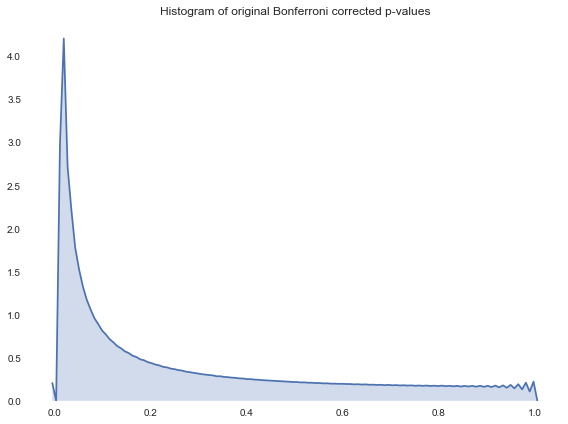

In [57]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Bonferroni corrected p-values')
sns.kdeplot(orig_pvalues.values.ravel(), shade=True)
plt.tight_layout()

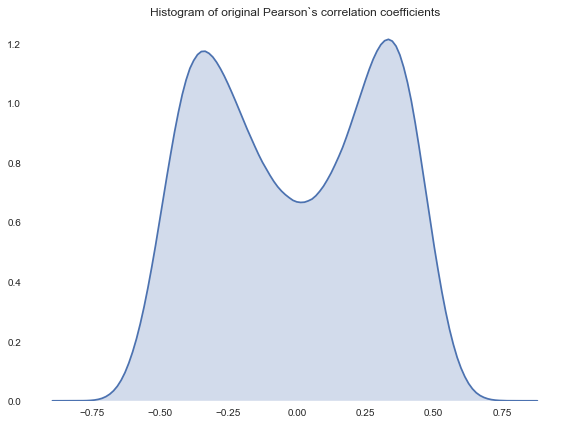

In [59]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Pearson`s correlation coefficients')
sns.kdeplot(orig_ccp.values.ravel(), shade=True)
plt.tight_layout()

/Users/severinlangberg/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/severinlangberg/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


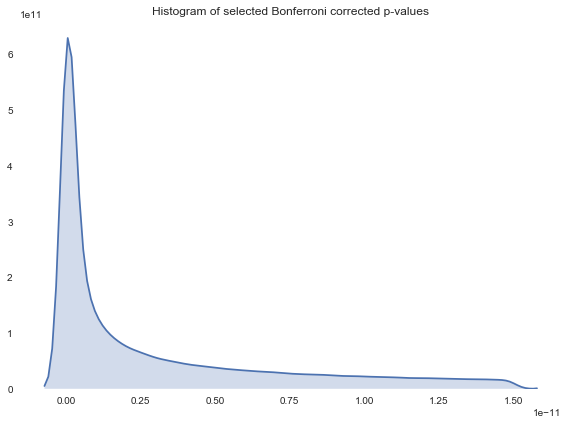

In [60]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of selected Bonferroni corrected p-values')
sns.kdeplot(sel_pvalues.values.ravel(), shade=True)
plt.tight_layout()

/Users/severinlangberg/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/severinlangberg/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


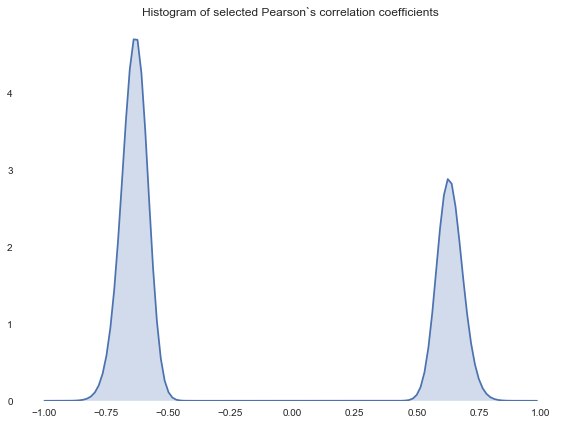

In [58]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of selected Pearson`s correlation coefficients')
sns.kdeplot(sel_ccp.values.ravel(), shade=True)
plt.tight_layout()